In [2]:
from cyc_pep_perm.models.randomforest import RF

rfreg = RF()
model = rfreg.train(datapath = '/home/rebecca/code/CycPepPerm/data/Cyclic_peptide_membrane_permeability_random80percent_mordred.csv',
                    savepath = '/home/rebecca/code/CycPepPerm/models/rf_random_mordred.pkl')
y_pred, rmse, r2 = rfreg.evaluate()
print(rmse, r2)

Best parameters: {'n_estimators': 400}
RMSE: 6.264
R-squared: 0.933
6.263908422070741 0.933410161186325


In [1]:
from cyc_pep_perm.models.xgboost import XGB

xgbreg = XGB()
model = xgbreg.train(datapath = '/home/rebecca/code/CycPepPerm/data/Cyclic_peptide_membrane_permeability_random80percent.csv',
                    savepath = '/home/rebecca/code/CycPepPerm/models/xgb_random_dw.pkl')
y_pred, rmse, r2 = xgbreg.evaluate()
print(rmse, r2)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Best parameters: {'n_estimators': 200}
RMSE: 5.451
R-squared: 0.950
5.451184969904821 0.9495688348944533


In [2]:
from cyc_pep_perm.models.xgboost import XGB

xgbreg = XGB()
model = xgbreg.train(datapath = '/home/rebecca/code/CycPepPerm/data/Cyclic_peptide_membrane_permeability_random80percent_mordred.csv',
                    savepath = '/home/rebecca/code/CycPepPerm/models/xgb_random_mordred.pkl')
y_pred, rmse, r2 = xgbreg.evaluate()
print(rmse, r2)

Best parameters: {'n_estimators': 100}
RMSE: 0.031
R-squared: 1.000
0.030831928653480185 0.9999983866873139


In [1]:
import pandas as pd

from cyc_pep_perm.models.randomforest import RF

rfreg = RF()
train = '/home/rebecca/code/CycPepPerm/data/Cyclic_peptide_membrane_permeability_random80percent.csv'
test = '/home/rebecca/code/CycPepPerm/data/Cyclic_peptide_membrane_permeability_random20percent.csv'
modelpath = '/home/rebecca/code/CycPepPerm/models/rf_random_dw.pkl'
train = pd.read_csv(train)
X = train.drop(["SMILES", "target"], axis=1)
X_test = pd.read_csv(test)
X_test = X_test.drop(["SMILES"], axis=1)

model = rfreg.load(modelpath)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [1]:
import pandas as pd

df = pd.read_csv('/home/rebecca/code/CycPepPerm/data/Cyclic_peptide_membrane_permeability_random80percent.csv')
df.head()

,SMILES,target,MW,cLogP,cLogS,HBA,HBD,Total Surface Area,Rel. PSA,PSA,Rot. Bonds,Amides
0,CC(C)[C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(NCC...,41.206682,821.50,3.0452,-6.508,13.0,5.0,644.43,0.29243,227.45,15.0,5.0
1,O=C(C[C@@H](C(N[C@H](CCCC1)[C@@H]1C(N(CCC1)C[C...,39.747970,825.53,2.9212,-6.027,13.0,4.0,640.81,0.28174,218.66,14.0,5.0
2,O=C(C[C@@H](C(NCC(NC(CC1)CCC1CC(NCCSCc1cccc(CS...,24.527463,785.47,2.1131,-5.843,13.0,5.0,615.45,0.30620,227.45,14.0,5.0
3,OC[C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(NCCOCC...,13.128625,813.44,-0.3120,-4.362,16.0,7.0,628.35,0.36048,276.36,17.0,5.0
4,CC(C)[C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(NCC...,86.647628,835.53,3.0732,-6.460,13.0,5.0,656.93,0.28686,227.45,17.0,5.0


In [7]:
df['target_bin'] = df['target'].apply(lambda x: 1 if x > 50 else 0)
df.head()

,SMILES,target,MW,cLogP,cLogS,HBA,HBD,Total Surface Area,Rel. PSA,PSA,Rot. Bonds,Amides,target_bin
0,CC(C)[C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(NCC...,41.206682,821.50,3.0452,-6.508,13.0,5.0,644.43,0.29243,227.45,15.0,5.0,0
1,O=C(C[C@@H](C(N[C@H](CCCC1)[C@@H]1C(N(CCC1)C[C...,39.747970,825.53,2.9212,-6.027,13.0,4.0,640.81,0.28174,218.66,14.0,5.0,0
2,O=C(C[C@@H](C(NCC(NC(CC1)CCC1CC(NCCSCc1cccc(CS...,24.527463,785.47,2.1131,-5.843,13.0,5.0,615.45,0.30620,227.45,14.0,5.0,0
3,OC[C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(NCCOCC...,13.128625,813.44,-0.3120,-4.362,16.0,7.0,628.35,0.36048,276.36,17.0,5.0,0
4,CC(C)[C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(NCC...,86.647628,835.53,3.0732,-6.460,13.0,5.0,656.93,0.28686,227.45,17.0,5.0,1


In [8]:
# count number of 1s and 0s
df['target_bin'].value_counts()

0    94
1    20
Name: target_bin, dtype: int64

In [1]:
from cyc_pep_perm.models.randomforest_class import RFClass

rfclass = RFClass()
model = rfclass.train(datapath = '/home/rebecca/code/CycPepPerm/data/Cyclic_peptide_membrane_permeability_random80percent.csv',
                    savepath = '/home/rebecca/code/CycPepPerm/models/rfclass_random_dw.pkl')
y_pred, acc, cm = rfclass.evaluate()
print(acc, cm)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Best parameters: {'class_weight': 'balanced_subsample', 'n_estimators': 100}
Accuracy: 0.974
Confusion matrix:
[[91  3]
 [ 0 20]]
0.9736842105263158 [[91  3]
 [ 0 20]]


In [2]:
import pandas as pd

df_test = pd.read_csv('/home/rebecca/code/CycPepPerm/data/Cyclic_peptide_membrane_permeability_random20percent.csv')
X_test = df_test.drop(["SMILES"], axis=1)
y_pred = rfclass.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
# save binary preds
df_test['pred_binary'] = y_pred
df_test.head()

,SMILES,MW,cLogP,cLogS,HBA,HBD,Total Surface Area,Rel. PSA,PSA,Rot. Bonds,Amides,pred_binary
0,Oc1ccc(C[C@@H](C(N(C2)CC2C(NCCSCc2cccc(CSCCC(N...,835.49,2.2740,-5.270,14.0,5.0,639.12,0.30298,238.89,16.0,5.0,0
1,Oc1ccc(C[C@@H](C(NCCSCc2cccc(CSCCC(N[C@@H](CC(...,899.57,3.4967,-6.869,14.0,6.0,699.78,0.28802,247.68,18.0,5.0,0
2,C[C@H]([C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(N...,818.46,-0.3741,-4.857,16.0,7.0,631.29,0.36411,290.77,18.0,6.0,0
3,O=C(C[C@@H](C(N(CCCC1)[C@H]1C(N(CC1)CCC1C(NCCS...,811.51,2.8204,-5.265,13.0,3.0,627.15,0.27526,209.87,14.0,5.0,0
4,CC(C)[C@@H](C(N(CC1)[C@@H]1C(NCCSCc1cccc(CSCCC...,771.44,1.9059,-5.079,13.0,4.0,596.27,0.30278,218.66,15.0,5.0,1


In [4]:
# save
df_test.to_csv('/home/rebecca/code/CycPepPerm/data/Cyclic_peptide_membrane_permeability_random20percent_dw_RFClass.csv', index=False)

TypeError: only integer scalar arrays can be converted to a scalar index

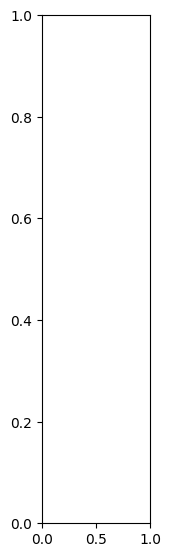

In [7]:
shap = rfclass.shap_explain()

In [9]:
import pandas as pd

filepath = '/home/rebecca/code/CycPepPerm/data/data20_labels.csv'

df = pd.read_csv(filepath)
df.head()

,ID,BB1,BB2,BB3,BB4,BB5,BB6,BB7,SMILES,MW,cLogP,cLogS,HBA,HBD,Total Surface Area,Rel. PSA,PSA,Rot. Bonds,Amides,CAPA [1 µM]
0,16,Mpa,Asp(CAPA),NaN,Tyr,3Aze,Res1,L4,Oc1ccc(C[C@@H](C(N(C2)CC2C(NCCSCc2cccc(CSCCC(N...,835.49,2.2740,-5.270,14,5,639.12,0.30298,238.89,16,5,12.1
1,17,Mpa,Asp(CAPA),NaN,Phe,Tyr,Res1,L4,Oc1ccc(C[C@@H](C(NCCSCc2cccc(CSCCC(N[C@@H](CC(...,899.57,3.4967,-6.869,14,6,699.78,0.28802,247.68,18,5,24.4
2,21,Mpa,Asp(CAPA),NaN,Gln,Thr,Res1,L4,C[C@H]([C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(N...,818.46,-0.3741,-4.857,16,7,631.29,0.36411,290.77,18,6,10.4
3,22,Mpa,Asp(CAPA),NaN,D-Pip,Isn,Res1,L4,O=C(C[C@@H](C(N(CCCC1)[C@H]1C(N(CC1)CCC1C(NCCS...,811.51,2.8204,-5.265,13,3,627.15,0.27526,209.87,14,5,55.4
4,23,Mpa,Asp(CAPA),NaN,Val,Aze,Res1,L4,CC(C)[C@@H](C(N(CC1)[C@@H]1C(NCCSCc1cccc(CSCCC...,771.44,1.9059,-5.079,13,4,596.27,0.30278,218.66,15,5,53.7


In [16]:
df_full = pd.read_csv('/home/rebecca/code/CycPepPerm/data/perm_random20_test_mordred.csv')
df_full.head()

,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,VE3_A,VR1_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,SMILES
0,70.524608,2.422422,4.844786,70.524608,1.259368,4.916128,4.450055,0.079465,3.215683,294078.399525,...,93.963407,834.321132,7.516407,15622,77,268.0,298.0,17.444444,12.861111,Oc1ccc(C[C@@H](C(N(C2)CC2C(NCCSCc2cccc(CSCCC(N...
1,77.805423,2.341892,4.683785,77.805423,1.275499,4.993370,5.637772,0.092422,3.537778,59440.079607,...,99.031578,898.352433,7.486270,18898,84,288.0,317.0,18.694444,14.083333,Oc1ccc(C[C@@H](C(NCCSCc2cccc(CSCCC(N[C@@H](CC(...
2,66.789727,2.324614,4.649229,66.789727,1.236847,4.853806,5.185249,0.096023,3.332217,40398.990677,...,91.135011,817.326946,7.430245,14195,73,246.0,267.0,19.333333,12.611111,C[C@H]([C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(N...
3,69.641153,2.419902,4.839804,69.641153,1.289651,4.877440,4.732239,0.087634,3.240798,139525.694782,...,91.658732,810.357518,7.171305,14199,79,258.0,289.0,16.333333,12.500000,O=C(C[C@@H](C(N(CCCC1)[C@H]1C(N(CC1)CCC1C(NCCS...
4,63.265425,2.440843,4.881687,63.265425,1.240499,4.815109,4.080159,0.080003,3.035376,394066.337656,...,88.445591,770.326218,7.267228,12398,71,240.0,267.0,17.083333,11.833333,CC(C)[C@@H](C(N(CC1)[C@@H]1C(NCCSCc1cccc(CSCCC...


In [17]:
for idx, row in df_full.iterrows():
    if df_full.loc[idx, 'SMILES'] == df.loc[idx, 'SMILES']:
        df_full.loc[idx, 'target'] = df.loc[idx, 'CAPA [1 µM]']
    else:
        print('SMILES mismatch')

In [18]:
df_full.head()

,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,VE3_A,VR1_A,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,SMILES,target
0,70.524608,2.422422,4.844786,70.524608,1.259368,4.916128,4.450055,0.079465,3.215683,294078.399525,...,834.321132,7.516407,15622,77,268.0,298.0,17.444444,12.861111,Oc1ccc(C[C@@H](C(N(C2)CC2C(NCCSCc2cccc(CSCCC(N...,12.1
1,77.805423,2.341892,4.683785,77.805423,1.275499,4.993370,5.637772,0.092422,3.537778,59440.079607,...,898.352433,7.486270,18898,84,288.0,317.0,18.694444,14.083333,Oc1ccc(C[C@@H](C(NCCSCc2cccc(CSCCC(N[C@@H](CC(...,24.4
2,66.789727,2.324614,4.649229,66.789727,1.236847,4.853806,5.185249,0.096023,3.332217,40398.990677,...,817.326946,7.430245,14195,73,246.0,267.0,19.333333,12.611111,C[C@H]([C@@H](C(NCCSCc1cccc(CSCCC(N[C@@H](CC(N...,10.4
3,69.641153,2.419902,4.839804,69.641153,1.289651,4.877440,4.732239,0.087634,3.240798,139525.694782,...,810.357518,7.171305,14199,79,258.0,289.0,16.333333,12.500000,O=C(C[C@@H](C(N(CCCC1)[C@H]1C(N(CC1)CCC1C(NCCS...,55.4
4,63.265425,2.440843,4.881687,63.265425,1.240499,4.815109,4.080159,0.080003,3.035376,394066.337656,...,770.326218,7.267228,12398,71,240.0,267.0,17.083333,11.833333,CC(C)[C@@H](C(N(CC1)[C@@H]1C(NCCSCc1cccc(CSCCC...,53.7


In [19]:
df_full.to_csv('/home/rebecca/code/CycPepPerm/data/perm_random20_test_mordred.csv', index=False)